In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle

CURRENT_DIR = os.path.dirname(os.getcwd())
PARENT_DIR = os.path.dirname(CURRENT_DIR)

DATA_DIR = os.path.join(PARENT_DIR, "gtracr", "gtracr", "data")
PLOT_DIR = os.path.join(PARENT_DIR,  "gtracr_plots")

iternum_list = np.arange(1, 10000, 500)
fpath = os.path.join(DATA_DIR, "benchmark_data.pkl")

with open(fpath, "rb") as f:
    benchmark_data = pickle.load(f)

0.004420277412905021
Average evaluation time of C++ scalar form: 2.262301e+02
Average evaluation time of C++ vector form: 1.893532e+02


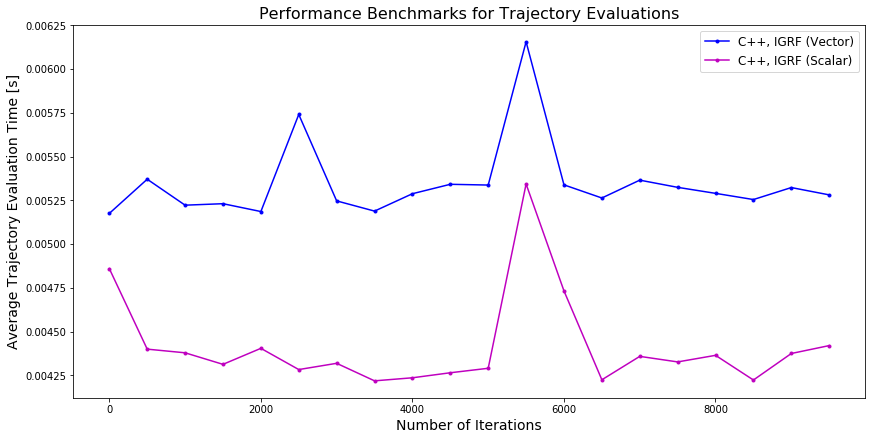

In [8]:
color_arr = ["b", "m", "g", "c", "r", "y"]

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True)

cppigrf_vec_data = benchmark_data["cppigrf_vec"]
cppigrf_novec_data = benchmark_data["cppigrf_novec"]


print(cppigrf_novec_data["values"][-1])
print("Average evaluation time of C++ scalar form: {:3e}".format(1. / cppigrf_novec_data["values"][-1]))
print("Average evaluation time of C++ vector form: {:3e}".format(1. / cppigrf_vec_data["values"][-1]))

ax.plot(iternum_list,
            cppigrf_vec_data["values"],
            label=cppigrf_vec_data["label"],
            color="b",
            marker="o",
            ms=3.0)

ax.plot(iternum_list,
            cppigrf_novec_data["values"],
            label=cppigrf_novec_data["label"],
            color="m",
            marker="o",
            ms=3.0)

ax.set_xlabel("Number of Iterations", fontsize=14)
ax.set_ylabel("Average Trajectory Evaluation Time [s]", fontsize=14)
ax.set_title("Performance Benchmarks for Trajectory Evaluations",
                fontsize=16)
ax.legend(loc="upper right", prop={'size': 12})

plt.savefig(os.path.join(PLOT_DIR, "benchmark_plot_igrf.png"))